In [2]:
#Machine Learning on Glass Classification Dataset

In [3]:
#importing libraries in Python SciPy and checking their versions
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


In [4]:
#Loading Libraries for the project
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
# Load dataset
dataset = read_csv("D:\\Machine Learning Projects\\Glass Classification Dataset\\glass.csv")
dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
#To check the number of rows and number of columns
print(dataset.shape)

(214, 10)


In [7]:
#For getting the top 20 values
print(dataset.head(20))

         RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5   1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6   1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7   1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8   1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
10  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24     1
11  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00     1
12  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24     1
13  1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.0  0.17  

In [8]:
#To get the summary of each attribute
print(dataset.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [9]:
#To see the distribution of data
print(dataset.groupby('Type').size())

Type
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


In [10]:
#Doing Data Visualization
#Using two types of plot for visualization
#Univariate-To better understand each attribute
#Multivariate- To better understand the relationship between different attributes

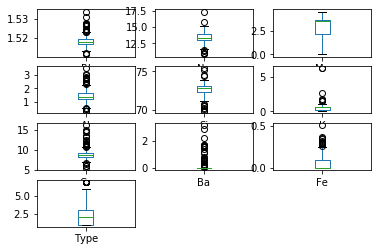

In [11]:
#Univariate - Box and Whisker Plot
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
pyplot.show()

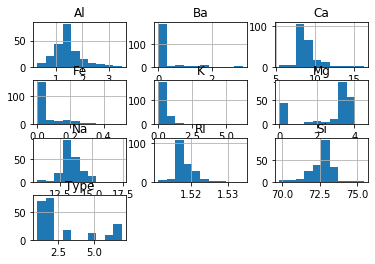

In [12]:
#Uniivariate - Histogram
dataset.hist()
pyplot.show()

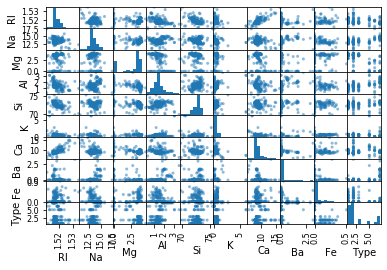

In [13]:
#Multivariate - Scatter Plot Mattrix
scatter_matrix(dataset)
#pyplot.figure(figsize=(10,5))
pyplot.show()

In [24]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [38]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=8, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.568821 (0.086856)
LDA: 0.622095 (0.129887)
KNN: 0.655299 (0.104969)
CART: 0.678520 (0.084270)
NB: 0.291712 (0.044256)
SVM: 0.602400 (0.053734)


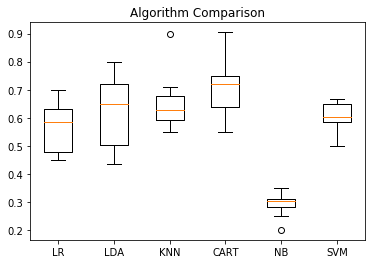

In [31]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [32]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [34]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6046511627906976
[[11  8  0  0  0  0]
 [ 1  9  0  2  0  0]
 [ 3  3  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
              precision    recall  f1-score   support

         1.0       0.73      0.58      0.65        19
         2.0       0.45      0.75      0.56        12
         3.0       0.00      0.00      0.00         6
         5.0       0.33      1.00      0.50         1
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           0.60        43
   macro avg       0.59      0.72      0.62        43
weighted avg       0.57      0.60      0.57        43

